# This is the code base for the assignment in EP8900
The aim of the assignment is to implement the SSP1 patway and to assess how this pathway results in different outputs than the baseline SSP2 scenario, for the South Africa MESSAGEix model.

We implement two vesions of SSP1: One where only the chosen input parameters are adjusted (SSP1_Scenario) and one where we also implement an emission bound (SSP1_BE_Scenario).

### Loading pacages and connecting to local database

In [11]:
# Load ixmp and message_ix packages
import ixmp                    # package for ix modeling platform
import message_ix              # package for MESSAGEix model
from message_ix.utils import make_df

In [12]:
# Loading the platform and connecting to a local database
mp = ixmp.Platform()

### Creating the baseline scenario, reading input data from the predefined excel file as given in the course, and lastly solving the screnario using the MESSAGEix model

In [13]:
# Create empty scenario
baseline = message_ix.Scenario(mp, model='MESSAGEix South Africa', 
                               scenario='baseline', version='new')

In [14]:
# Read South Africa model from Excel (init_items = True is important as this scenario also includes MACRO)
baseline.read_excel("MESSAGEix_South_Africa.xlsx", add_units=True, commit_steps=False, init_items=True)

In [15]:
# Solve baseline scenario
baseline.solve()

### Cloning the baseline scenario to produce the SSP1 scenario without emission bound
We also check out the scenario to enable it for editing.

In [16]:
# Clone baseline scenario for modification
SSP1_Scenario = baseline.clone('MESSAGEix South Africa', 'SSP1 scenario','Copy of the baseline scenario with adjusted parameters to SSP1 pathway',
                  keep_solution=False)

In [17]:
# Check out scenario for editing
SSP1_Scenario.check_out()

### Adjusting the demand parameter
In this step we implement population values for SSP1 and SSP2 from the [SSP database](https://tntcat.iiasa.ac.at/SspDb/dsd?Action=htmlpage&page=20) and create a list with population metrics for 2020-2070.
We use the population metric list to create dataframes for each of the commodities and use the add_par function to adjust the demand to the SSP1 scenario.

In [18]:
# Create list with population values for the years 2020-2070
IIASA_pop_SSP2=[54.7969958140426, 58.5854183946507, 61.2539140832856, 63.0449100863284, 64.0418430661031, 64.0279592886690]

IIASA_pop_SSP1=[54.7091100163246, 58.4683392771180, 61.0348651404822, 62.3439467627265, 62.2147085484642, 60.5802501616858]

from operator import truediv

Population_metric=list(map(truediv, IIASA_pop_SSP1, IIASA_pop_SSP2))

print('Population metric is as follows for the years 2020-2070:')
print(Population_metric)

Population metric is as follows for the years 2020-2070:
[0.9983961566430348, 0.9980015655645912, 0.9964239192534607, 0.9888815239383789, 0.971469676227885, 0.9461530686705278]


In [19]:
#-----ADJUSTING TO SSP1 DEMAND-----#

#importing panda package and naming it pd
import pandas as pd


#---i_feed---#
#making a dataframe 'df' with the SSP1 demand for the i_feed commodity 

df=pd.DataFrame(SSP1_Scenario.par('demand', dict(node='South Africa', level='useful', commodity='i_feed', year = [2020, 2030, 2040, 2050, 2060, 2070])))
df.iloc[:,5]=df.iloc[:,5].multiply(Population_metric, axis='index')

#implementing the SSP1 i_feed dataframe into the demand parameter
SSP1_Scenario.add_par('demand', df)

#---i_spec---#
#making a dataframe 'df' with the SSP1 demand for the i_spec commodity 
df=pd.DataFrame(SSP1_Scenario.par('demand', dict(node='South Africa', level='useful', commodity='i_spec', year = [2020, 2030, 2040, 2050, 2060, 2070])))
df.iloc[:,5]=df.iloc[:,5].multiply(Population_metric, axis='index')


#implementing the SSP1 i_spec dataframe into the demand parameter
SSP1_Scenario.add_par('demand', df)                   


#---i_therm---#
#making a dataframe 'df' with the SSP1 demand for the i_therm commodity 
df=pd.DataFrame(SSP1_Scenario.par('demand', dict(node='South Africa', level='useful', commodity='i_therm', year = [ 2020, 2030, 2040, 2050, 2060, 2070])))
df.iloc[:,5]=df.iloc[:,5].multiply(Population_metric, axis='index')

#implementing the SSP1 i_therm dataframe into the demand parameter
SSP1_Scenario.add_par('demand', df)


#---rc_spec---#
#making a dataframe 'df' with the SSP1 demand for the rc_spec commodity 
df=pd.DataFrame(SSP1_Scenario.par('demand', dict(node='South Africa', level='useful', commodity='rc_spec', year = [2020, 2030, 2040, 2050, 2060, 2070])))
df.iloc[:,5]=df.iloc[:,5].multiply(Population_metric, axis='index')

#implementing the SSP1 rc_spec dataframe into the demand parameter
SSP1_Scenario.add_par('demand', df)


#---rc_therm---#

#making a dataframe 'df' with the SSP1 demand for the rc_therm commodity 
df=pd.DataFrame(SSP1_Scenario.par('demand', dict(node='South Africa', level='useful', commodity='rc_therm', year = [2020, 2030, 2040, 2050, 2060, 2070])))
df.iloc[:,5]=df.iloc[:,5].multiply(Population_metric, axis='index')

#implementing the SSP1 rc_therm dataframe into the demand parameter
SSP1_Scenario.add_par('demand', df)


#---transport---#
#making a dataframe 'df' with the SSP1 demand for the transport commodity 
df=pd.DataFrame(SSP1_Scenario.par('demand', dict(node='South Africa', level='useful', commodity='transport', year = [2020, 2030, 2040, 2050, 2060, 2070])))
df.iloc[:,5]=df.iloc[:,5].multiply(Population_metric, axis='index')
                   
#implementing the SSP1 transport dataframe into the demand parameter
SSP1_Scenario.add_par('demand', df)

In [20]:
# Printing scenario demand to check

SSP1_Scenario.par('demand')

,node,commodity,level,year,time,value,unit
0,South Africa,i_feed,useful,2010,year,5.305206,GWa/a
1,South Africa,i_feed,useful,2020,year,5.677516,GWa/a
2,South Africa,i_feed,useful,2030,year,6.760097,GWa/a
3,South Africa,i_feed,useful,2040,year,7.496474,GWa/a
4,South Africa,i_feed,useful,2050,year,8.061493,GWa/a
5,South Africa,i_feed,useful,2060,year,8.530364,GWa/a
6,South Africa,i_feed,useful,2070,year,8.902959,GWa/a
7,South Africa,i_spec,useful,2010,year,9.796942,GWa/a
8,South Africa,i_spec,useful,2020,year,13.405300,GWa/a
9,South Africa,i_spec,useful,2030,year,17.728209,GWa/a


### Adjusting the cost parameters
In this step we create lists to be used for scaling the assessed cost parameters.
We create lists who are multiplied with the cost values, as well as technolgy lists to simplify the computation.

In [21]:
#making lists to be used for scaling the various cost parameters (for reasoning: Check paper)

#used on coal_adv, coal_adv_ccs, coal_bal, coal_extr, coal_fs, coal_gas, coal_i, coal_ppl, coal_rc, coal_t_d, igcc, igcc_ccs. All figures presented in appendix were used for reasoning
coal_factor=[1.02, 1.02, 1.02, 1.04, 1.04]
coal_tech_inv=['coal_adv', 'coal_adv_ccs', 'coal_extr', 'coal_gas', 'coal_i', 'coal_ppl', 'igcc', 'igcc_ccs']
coal_tech_fix_var=['coal_adv', 'coal_adv_ccs', 'coal_bal', 'coal_extr', 'coal_fs', 'coal_gas', 'coal_i', 'coal_ppl', 'coal_rc', 'coal_t_d', 'igcc', 'igcc_ccs']

#used on biomass_rc and biomass_nc Figure 4 "Residential Final Energy" used for reasoning
biomass_rc_nc_factor=[1.03, 1.03, 1.03, 1.03, 1.03]
biomass_rc_nc_tech=['biomass_rc', 'biomass_nc']


#used on biomass_i Figure 4 "Industry Final Energy" used as reasoning
biomass_i_factor=[0.99, 0.98, 0.98, 1.02, 1.02]

#used on elec_i and sp_el_i. Figure 4 "Industry Final Energy" used for reasoning
elec_i_factor=[1, 1, 1.02, 1.03, 1.03]
elec_i_tech=['elec_i', 'sp_el_i']

#used on elec_t_d. The total picture given in Figure 3 was used for reasoning
elec_td_factor=[0.98, 0.98, 0.99, 1.02, 1.02]

#used on gas_cc, gas_cc_ccs, gas_ct, gas_ppl. Figure 3 was used for reasoning
gas_secondary_factor=[0.98, 0.98, 0.98, 0.97, 0.97]
gas_secondary_tech=['gas_cc', 'gas_cc_ccs', 'gas_ct', 'gas_ppl']

#used on gas_fs and gas_i the Figure 4 "Industry Final Energy" was used as reasoning
gas_i_factor=[0.98, 0.98, 0.98, 0.98, 0.98]
gas_i_tech=['gas_fs', 'gas_i']

#used on gas_rc and gas_trp. Figure 4 "Residential Final Energy" and "Transport Final Energy" was used as reasoning
gas_rc_trp_factor=[1, 1.01, 1.01, 1.02, 1.02]
gas_rc_trp_tech=['gas_rc', 'gas_trp']

#used for loil_trp. Figure 4 "Transport Final Energy" was used for reasoning
loil_trp_factor=[1.01, 1.02, 1.02, 1.03, 1.05]

#used for nuclear_ppl. Figure 3 used for reasoning
nuc_factor=[1.02, 1.02, 1.02, 1.03, 1.03]

#used for oil_extr. Figure 2 used for reasoning
oil_extr_factor=[1, 1.01, 1.02, 1.03, 1.03]

#used for solar_i, solar_pv_ppl, solar_th_ppl, solar_th_ppl_base, wind_ppl. Figure 3 used for reasoning
solar_wind_factor=[0.97, 0.97, 0.96, 0.96, 0.95]
solar_wind_tech=['solar_i', 'solar_pv_ppl', 'solar_th_ppl', 'solar_th_ppl_base', 'wind_ppl']




In [22]:
#------COAL COSTS SSP1------#

import pandas as pd

years = [2030, 2040, 2050, 2060, 2070]

#inv_cost
for i in coal_tech_inv:
    df=pd.DataFrame(SSP1_Scenario.par('inv_cost', dict(node_loc='South Africa', technology=i, year_vtg = [2030, 2040, 2050, 2060, 2070])))
    df.iloc[:,3]=df.iloc[:,3].multiply(coal_factor, axis='index')
    SSP1_Scenario.add_par('inv_cost', df)


#fix_cost
for i in coal_tech_fix_var:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('fix_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,4]=df0.iloc[:,4].multiply(coal_factor[0], axis='index')
        SSP1_Scenario.add_par('fix_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,4]=df1.iloc[:,4].multiply(coal_factor[1], axis='index')
        SSP1_Scenario.add_par('fix_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,4]=df2.iloc[:,4].multiply(coal_factor[2], axis='index')
        SSP1_Scenario.add_par('fix_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,4]=df3.iloc[:,4].multiply(coal_factor[3], axis='index')
        SSP1_Scenario.add_par('fix_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,4]=df4.iloc[:,4].multiply(coal_factor[4], axis='index')
        SSP1_Scenario.add_par('fix_cost', df4)



#var_cost
for i in coal_tech_fix_var:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('var_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,6]=df0.iloc[:,6].multiply(coal_factor[0], axis='index')
        SSP1_Scenario.add_par('var_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,6]=df1.iloc[:,6].multiply(coal_factor[1], axis='index')
        SSP1_Scenario.add_par('var_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,6]=df2.iloc[:,6].multiply(coal_factor[2], axis='index')
        SSP1_Scenario.add_par('var_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,6]=df3.iloc[:,6].multiply(coal_factor[3], axis='index')
        SSP1_Scenario.add_par('var_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,6]=df4.iloc[:,6].multiply(coal_factor[4], axis='index')
        SSP1_Scenario.add_par('var_cost', df4)

        

In [23]:
#------BIOMASS RC and NC COSTS SSP1------#

#inv_cost
df=pd.DataFrame(SSP1_Scenario.par('inv_cost', dict(node_loc='South Africa', technology='biomass_nc', year_vtg = [2030, 2040, 2050, 2060, 2070])))
df.iloc[:,3]=df.iloc[:,3].multiply(biomass_rc_nc_factor, axis='index')
SSP1_Scenario.add_par('inv_cost', df)

#fix_cost
for i in biomass_rc_nc_tech:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('fix_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,4]=df0.iloc[:,4].multiply(biomass_rc_nc_factor[0], axis='index')
        SSP1_Scenario.add_par('fix_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,4]=df1.iloc[:,4].multiply(biomass_rc_nc_factor[1], axis='index')
        SSP1_Scenario.add_par('fix_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,4]=df2.iloc[:,4].multiply(biomass_rc_nc_factor[2], axis='index')
        SSP1_Scenario.add_par('fix_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,4]=df3.iloc[:,4].multiply(biomass_rc_nc_factor[3], axis='index')
        SSP1_Scenario.add_par('fix_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,4]=df4.iloc[:,4].multiply(biomass_rc_nc_factor[4], axis='index')
        SSP1_Scenario.add_par('fix_cost', df4)

#var_cost
for i in biomass_rc_nc_tech:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('var_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,6]=df0.iloc[:,6].multiply(biomass_rc_nc_factor[0], axis='index')
        SSP1_Scenario.add_par('var_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,6]=df1.iloc[:,6].multiply(biomass_rc_nc_factor[1], axis='index')
        SSP1_Scenario.add_par('var_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,6]=df2.iloc[:,6].multiply(biomass_rc_nc_factor[2], axis='index')
        SSP1_Scenario.add_par('var_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,6]=df3.iloc[:,6].multiply(biomass_rc_nc_factor[3], axis='index')
        SSP1_Scenario.add_par('var_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,6]=df4.iloc[:,6].multiply(biomass_rc_nc_factor[4], axis='index')
        SSP1_Scenario.add_par('var_cost', df4)


In [24]:
#------BIOMASS INDUSTRY COSTS SSP1------#

#inv_cost
df=pd.DataFrame(SSP1_Scenario.par('inv_cost', dict(node_loc='South Africa', technology='biomass_i', year_vtg = [2030, 2040, 2050, 2060, 2070])))
df.iloc[:,3]=df.iloc[:,3].multiply(biomass_i_factor, axis='index')
SSP1_Scenario.add_par('inv_cost', df)


#fix_cost
for y in years:
    df=pd.DataFrame(SSP1_Scenario.par('fix_cost', dict(node_loc='South Africa', technology='biomass_i', year_act=y)))
    df0=df.loc[df.year_act==2030,:]
    df0.iloc[:,4]=df0.iloc[:,4].multiply(biomass_i_factor[0], axis='index')
    SSP1_Scenario.add_par('fix_cost', df0)
    df1=df.loc[df.year_act==2040,:]
    df1.iloc[:,4]=df1.iloc[:,4].multiply(biomass_i_factor[1], axis='index')
    SSP1_Scenario.add_par('fix_cost', df1)
    df2=df.loc[df.year_act==2050,:]
    df2.iloc[:,4]=df2.iloc[:,4].multiply(biomass_i_factor[2], axis='index')
    SSP1_Scenario.add_par('fix_cost', df2)
    df3=df.loc[df.year_act==2060,:]
    df3.iloc[:,4]=df3.iloc[:,4].multiply(biomass_i_factor[3], axis='index')
    SSP1_Scenario.add_par('fix_cost', df3)
    df4=df.loc[df.year_act==2070,:]
    df4.iloc[:,4]=df4.iloc[:,4].multiply(biomass_i_factor[4], axis='index')
    SSP1_Scenario.add_par('fix_cost', df4)

#var_cost
for y in years:
    df=pd.DataFrame(SSP1_Scenario.par('var_cost', dict(node_loc='South Africa', technology='biomass_i', year_act=y)))
    df0=df.loc[df.year_act==2030,:]
    df0.iloc[:,6]=df0.iloc[:,6].multiply(biomass_i_factor[0], axis='index')
    SSP1_Scenario.add_par('var_cost', df0)
    df1=df.loc[df.year_act==2040,:]
    df1.iloc[:,6]=df1.iloc[:,6].multiply(biomass_i_factor[1], axis='index')
    SSP1_Scenario.add_par('var_cost', df1)
    df2=df.loc[df.year_act==2050,:]
    df2.iloc[:,6]=df2.iloc[:,6].multiply(biomass_i_factor[2], axis='index')
    SSP1_Scenario.add_par('var_cost', df2)
    df3=df.loc[df.year_act==2060,:]
    df3.iloc[:,6]=df3.iloc[:,6].multiply(biomass_i_factor[3], axis='index')
    SSP1_Scenario.add_par('var_cost', df3)
    df4=df.loc[df.year_act==2070,:]
    df4.iloc[:,6]=df4.iloc[:,6].multiply(biomass_i_factor[4], axis='index')
    SSP1_Scenario.add_par('var_cost', df4)


In [25]:
#------ELEC_I and SP_EL_I COSTS SSP1------#

#inv_costs
df=pd.DataFrame(SSP1_Scenario.par('inv_cost', dict(node_loc='South Africa', technology='elec_i', year_vtg = [2030, 2040, 2050, 2060, 2070])))
df.iloc[:,3]=df.iloc[:,3].multiply(elec_i_factor, axis='index')
SSP1_Scenario.add_par('inv_cost', df)

#fix_cost
for i in elec_i_tech:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('fix_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,4]=df0.iloc[:,4].multiply(elec_i_factor[0], axis='index')
        SSP1_Scenario.add_par('fix_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,4]=df1.iloc[:,4].multiply(elec_i_factor[1], axis='index')
        SSP1_Scenario.add_par('fix_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,4]=df2.iloc[:,4].multiply(elec_i_factor[2], axis='index')
        SSP1_Scenario.add_par('fix_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,4]=df3.iloc[:,4].multiply(elec_i_factor[3], axis='index')
        SSP1_Scenario.add_par('fix_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,4]=df4.iloc[:,4].multiply(elec_i_factor[4], axis='index')
        SSP1_Scenario.add_par('fix_cost', df4)

#var_cost
for i in elec_i_tech:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('var_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,6]=df0.iloc[:,6].multiply(elec_i_factor[0], axis='index')
        SSP1_Scenario.add_par('var_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,6]=df1.iloc[:,6].multiply(elec_i_factor[1], axis='index')
        SSP1_Scenario.add_par('var_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,6]=df2.iloc[:,6].multiply(elec_i_factor[2], axis='index')
        SSP1_Scenario.add_par('var_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,6]=df3.iloc[:,6].multiply(elec_i_factor[3], axis='index')
        SSP1_Scenario.add_par('var_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,6]=df4.iloc[:,6].multiply(elec_i_factor[4], axis='index')
        SSP1_Scenario.add_par('var_cost', df4)



In [26]:
##------ELEC_T_D COSTS SSP1------#

#inv_cost
df=pd.DataFrame(SSP1_Scenario.par('inv_cost', dict(node_loc='South Africa', technology='elec_t_d', year_vtg = [2030, 2040, 2050, 2060, 2070])))
df.iloc[:,3]=df.iloc[:,3].multiply(elec_td_factor, axis='index')
SSP1_Scenario.add_par('inv_cost', df)

#fix_cost
for y in years:
    df=pd.DataFrame(SSP1_Scenario.par('fix_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
    df0=df.loc[df.year_act==2030,:]
    df0.iloc[:,4]=df0.iloc[:,4].multiply(elec_td_factor[0], axis='index')
    SSP1_Scenario.add_par('fix_cost', df0)
    df1=df.loc[df.year_act==2040,:]
    df1.iloc[:,4]=df1.iloc[:,4].multiply(elec_td_factor[1], axis='index')
    SSP1_Scenario.add_par('fix_cost', df1)
    df2=df.loc[df.year_act==2050,:]
    df2.iloc[:,4]=df2.iloc[:,4].multiply(elec_td_factor[2], axis='index')
    SSP1_Scenario.add_par('fix_cost', df2)
    df3=df.loc[df.year_act==2060,:]
    df3.iloc[:,4]=df3.iloc[:,4].multiply(elec_td_factor[3], axis='index')
    SSP1_Scenario.add_par('fix_cost', df3)
    df4=df.loc[df.year_act==2070,:]
    df4.iloc[:,4]=df4.iloc[:,4].multiply(elec_td_factor[4], axis='index')
    SSP1_Scenario.add_par('fix_cost', df4)

#var_cost
for y in years:
    df=pd.DataFrame(SSP1_Scenario.par('var_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
    df0=df.loc[df.year_act==2030,:]
    df0.iloc[:,6]=df0.iloc[:,6].multiply(elec_td_factor[0], axis='index')
    SSP1_Scenario.add_par('var_cost', df0)
    df1=df.loc[df.year_act==2040,:]
    df1.iloc[:,6]=df1.iloc[:,6].multiply(elec_td_factor[1], axis='index')
    SSP1_Scenario.add_par('var_cost', df1)
    df2=df.loc[df.year_act==2050,:]
    df2.iloc[:,6]=df2.iloc[:,6].multiply(elec_td_factor[2], axis='index')
    SSP1_Scenario.add_par('var_cost', df2)
    df3=df.loc[df.year_act==2060,:]
    df3.iloc[:,6]=df3.iloc[:,6].multiply(elec_td_factor[3], axis='index')
    SSP1_Scenario.add_par('var_cost', df3)
    df4=df.loc[df.year_act==2070,:]
    df4.iloc[:,6]=df4.iloc[:,6].multiply(elec_td_factor[4], axis='index')
    SSP1_Scenario.add_par('var_cost', df4)

In [27]:
#------GAS SECONDARY COSTS SSP1------#

#inv_cost
for i in gas_secondary_tech:
    df=pd.DataFrame(SSP1_Scenario.par('inv_cost', dict(node_loc='South Africa', technology=i, year_vtg = [2030, 2040, 2050, 2060, 2070])))
    df.iloc[:,3]=df.iloc[:,3].multiply(gas_secondary_factor, axis='index')
    SSP1_Scenario.add_par('inv_cost', df)


#fix_cost
for i in gas_secondary_tech:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('fix_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,4]=df0.iloc[:,4].multiply(gas_secondary_factor[0], axis='index')
        SSP1_Scenario.add_par('fix_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,4]=df1.iloc[:,4].multiply(gas_secondary_factor[1], axis='index')
        SSP1_Scenario.add_par('fix_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,4]=df2.iloc[:,4].multiply(gas_secondary_factor[2], axis='index')
        SSP1_Scenario.add_par('fix_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,4]=df3.iloc[:,4].multiply(gas_secondary_factor[3], axis='index')
        SSP1_Scenario.add_par('fix_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,4]=df4.iloc[:,4].multiply(gas_secondary_factor[4], axis='index')
        SSP1_Scenario.add_par('fix_cost', df4)



#var_cost
for i in gas_secondary_tech:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('var_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,6]=df0.iloc[:,6].multiply(gas_secondary_factor[0], axis='index')
        SSP1_Scenario.add_par('var_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,6]=df1.iloc[:,6].multiply(gas_secondary_factor[1], axis='index')
        SSP1_Scenario.add_par('var_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,6]=df2.iloc[:,6].multiply(gas_secondary_factor[2], axis='index')
        SSP1_Scenario.add_par('var_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,6]=df3.iloc[:,6].multiply(gas_secondary_factor[3], axis='index')
        SSP1_Scenario.add_par('var_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,6]=df4.iloc[:,6].multiply(gas_secondary_factor[4], axis='index')
        SSP1_Scenario.add_par('var_cost', df4)

        

In [28]:
#------GAS INDUSTRY COSTS SSP1------#

#inv_cost
df=pd.DataFrame(SSP1_Scenario.par('inv_cost', dict(node_loc='South Africa', technology='gas_i', year_vtg = [2030, 2040, 2050, 2060, 2070])))
df.iloc[:,3]=df.iloc[:,3].multiply(gas_i_factor, axis='index')
SSP1_Scenario.add_par('inv_cost', df)


#fix_cost
for i in gas_i_tech:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('fix_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,4]=df0.iloc[:,4].multiply(gas_i_factor[0], axis='index')
        SSP1_Scenario.add_par('fix_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,4]=df1.iloc[:,4].multiply(gas_i_factor[1], axis='index')
        SSP1_Scenario.add_par('fix_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,4]=df2.iloc[:,4].multiply(gas_i_factor[2], axis='index')
        SSP1_Scenario.add_par('fix_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,4]=df3.iloc[:,4].multiply(gas_i_factor[3], axis='index')
        SSP1_Scenario.add_par('fix_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,4]=df4.iloc[:,4].multiply(gas_i_factor[4], axis='index')
        SSP1_Scenario.add_par('fix_cost', df4)



#var_cost
for i in gas_i_tech:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('var_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,6]=df0.iloc[:,6].multiply(gas_i_factor[0], axis='index')
        SSP1_Scenario.add_par('var_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,6]=df1.iloc[:,6].multiply(gas_i_factor[1], axis='index')
        SSP1_Scenario.add_par('var_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,6]=df2.iloc[:,6].multiply(gas_i_factor[2], axis='index')
        SSP1_Scenario.add_par('var_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,6]=df3.iloc[:,6].multiply(gas_i_factor[3], axis='index')
        SSP1_Scenario.add_par('var_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,6]=df4.iloc[:,6].multiply(gas_i_factor[4], axis='index')
        SSP1_Scenario.add_par('var_cost', df4)

        

In [29]:
#------GAS RC and TRP COSTS SSP1------#

#inv_cost
#gas_rc and gas_trp has none investment cost



#fix_cost
for i in gas_rc_trp_tech:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('fix_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,4]=df0.iloc[:,4].multiply(gas_rc_trp_factor[0], axis='index')
        SSP1_Scenario.add_par('fix_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,4]=df1.iloc[:,4].multiply(gas_rc_trp_factor[1], axis='index')
        SSP1_Scenario.add_par('fix_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,4]=df2.iloc[:,4].multiply(gas_rc_trp_factor[2], axis='index')
        SSP1_Scenario.add_par('fix_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,4]=df3.iloc[:,4].multiply(gas_rc_trp_factor[3], axis='index')
        SSP1_Scenario.add_par('fix_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,4]=df4.iloc[:,4].multiply(gas_rc_trp_factor[4], axis='index')
        SSP1_Scenario.add_par('fix_cost', df4)



#var_cost
for i in gas_rc_trp_tech:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('var_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,6]=df0.iloc[:,6].multiply(gas_rc_trp_factor[0], axis='index')
        SSP1_Scenario.add_par('var_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,6]=df1.iloc[:,6].multiply(gas_rc_trp_factor[1], axis='index')
        SSP1_Scenario.add_par('var_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,6]=df2.iloc[:,6].multiply(gas_rc_trp_factor[2], axis='index')
        SSP1_Scenario.add_par('var_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,6]=df3.iloc[:,6].multiply(gas_rc_trp_factor[3], axis='index')
        SSP1_Scenario.add_par('var_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,6]=df4.iloc[:,6].multiply(gas_rc_trp_factor[4], axis='index')
        SSP1_Scenario.add_par('var_cost', df4)

        

In [30]:
#------LOIL_TRP COSTS SSP1------#

#inv_cost
#loil_trp has none investment cost



#fix_cost
for y in years:
    df=pd.DataFrame(SSP1_Scenario.par('fix_cost', dict(node_loc='South Africa', technology='loil_trp', year_act=y)))
    df0=df.loc[df.year_act==2030,:]
    df0.iloc[:,4]=df0.iloc[:,4].multiply(loil_trp_factor[0], axis='index')
    SSP1_Scenario.add_par('fix_cost', df0)
    df1=df.loc[df.year_act==2040,:]
    df1.iloc[:,4]=df1.iloc[:,4].multiply(loil_trp_factor[1], axis='index')
    SSP1_Scenario.add_par('fix_cost', df1)
    df2=df.loc[df.year_act==2050,:]
    df2.iloc[:,4]=df2.iloc[:,4].multiply(loil_trp_factor[2], axis='index')
    SSP1_Scenario.add_par('fix_cost', df2)
    df3=df.loc[df.year_act==2060,:]
    df3.iloc[:,4]=df3.iloc[:,4].multiply(loil_trp_factor[3], axis='index')
    SSP1_Scenario.add_par('fix_cost', df3)
    df4=df.loc[df.year_act==2070,:]
    df4.iloc[:,4]=df4.iloc[:,4].multiply(loil_trp_factor[4], axis='index')
    SSP1_Scenario.add_par('fix_cost', df4)



#var_cost
for y in years:
    df=pd.DataFrame(SSP1_Scenario.par('var_cost', dict(node_loc='South Africa', technology='loil_trp', year_act=y)))
    df0=df.loc[df.year_act==2030,:]
    df0.iloc[:,6]=df0.iloc[:,6].multiply(loil_trp_factor[0], axis='index')
    SSP1_Scenario.add_par('var_cost', df0)
    df1=df.loc[df.year_act==2040,:]
    df1.iloc[:,6]=df1.iloc[:,6].multiply(loil_trp_factor[1], axis='index')
    SSP1_Scenario.add_par('var_cost', df1)
    df2=df.loc[df.year_act==2050,:]
    df2.iloc[:,6]=df2.iloc[:,6].multiply(loil_trp_factor[2], axis='index')
    SSP1_Scenario.add_par('var_cost', df2)
    df3=df.loc[df.year_act==2060,:]
    df3.iloc[:,6]=df3.iloc[:,6].multiply(loil_trp_factor[3], axis='index')
    SSP1_Scenario.add_par('var_cost', df3)
    df4=df.loc[df.year_act==2070,:]
    df4.iloc[:,6]=df4.iloc[:,6].multiply(loil_trp_factor[4], axis='index')
    SSP1_Scenario.add_par('var_cost', df4)

        

In [31]:
#------NUCLEAR POWER PLANT COSTS SSP1------#

#inv_cost
df=pd.DataFrame(SSP1_Scenario.par('inv_cost', dict(node_loc='South Africa', technology='nuc_ppl', year_vtg = [2030, 2040, 2050, 2060, 2070])))
df.iloc[:,3]=df.iloc[:,3].multiply(nuc_factor, axis='index')
SSP1_Scenario.add_par('inv_cost', df)


#fix_cost
for y in years:
    df=pd.DataFrame(SSP1_Scenario.par('fix_cost', dict(node_loc='South Africa', technology='nuc_ppl', year_act=y)))
    df0=df.loc[df.year_act==2030,:]
    df0.iloc[:,4]=df0.iloc[:,4].multiply(nuc_factor[0], axis='index')
    SSP1_Scenario.add_par('fix_cost', df0)
    df1=df.loc[df.year_act==2040,:]
    df1.iloc[:,4]=df1.iloc[:,4].multiply(nuc_factor[1], axis='index')
    SSP1_Scenario.add_par('fix_cost', df1)
    df2=df.loc[df.year_act==2050,:]
    df2.iloc[:,4]=df2.iloc[:,4].multiply(nuc_factor[2], axis='index')
    SSP1_Scenario.add_par('fix_cost', df2)
    df3=df.loc[df.year_act==2060,:]
    df3.iloc[:,4]=df3.iloc[:,4].multiply(nuc_factor[3], axis='index')
    SSP1_Scenario.add_par('fix_cost', df3)
    df4=df.loc[df.year_act==2070,:]
    df4.iloc[:,4]=df4.iloc[:,4].multiply(nuc_factor[4], axis='index')
    SSP1_Scenario.add_par('fix_cost', df4)



#var_cost
for y in years:
    df=pd.DataFrame(SSP1_Scenario.par('var_cost', dict(node_loc='South Africa', technology='nuc_ppl', year_act=y)))
    df0=df.loc[df.year_act==2030,:]
    df0.iloc[:,6]=df0.iloc[:,6].multiply(nuc_factor[0], axis='index')
    SSP1_Scenario.add_par('var_cost', df0)
    df1=df.loc[df.year_act==2040,:]
    df1.iloc[:,6]=df1.iloc[:,6].multiply(nuc_factor[1], axis='index')
    SSP1_Scenario.add_par('var_cost', df1)
    df2=df.loc[df.year_act==2050,:]
    df2.iloc[:,6]=df2.iloc[:,6].multiply(nuc_factor[2], axis='index')
    SSP1_Scenario.add_par('var_cost', df2)
    df3=df.loc[df.year_act==2060,:]
    df3.iloc[:,6]=df3.iloc[:,6].multiply(nuc_factor[3], axis='index')
    SSP1_Scenario.add_par('var_cost', df3)
    df4=df.loc[df.year_act==2070,:]
    df4.iloc[:,6]=df4.iloc[:,6].multiply(nuc_factor[4], axis='index')
    SSP1_Scenario.add_par('var_cost', df4)

        

In [32]:
#------OIL EXTRACTION COSTS SSP1------#

#inv_cost
df=pd.DataFrame(SSP1_Scenario.par('inv_cost', dict(node_loc='South Africa', technology='oil_extr', year_vtg = [2030, 2040, 2050, 2060, 2070])))
df.iloc[:,3]=df.iloc[:,3].multiply(oil_extr_factor, axis='index')
SSP1_Scenario.add_par('inv_cost', df)


#fix_cost
#oil_extr has none investment cost in SSP2 baseline. Assumes the same for SSP1 scenario.


#var_cost
for y in years:
    df=pd.DataFrame(SSP1_Scenario.par('var_cost', dict(node_loc='South Africa', technology='oil_extr', year_act=y)))
    df0=df.loc[df.year_act==2030,:]
    df0.iloc[:,6]=df0.iloc[:,6].multiply(oil_extr_factor[0], axis='index')
    SSP1_Scenario.add_par('var_cost', df0)
    df1=df.loc[df.year_act==2040,:]
    df1.iloc[:,6]=df1.iloc[:,6].multiply(oil_extr_factor[1], axis='index')
    SSP1_Scenario.add_par('var_cost', df1)
    df2=df.loc[df.year_act==2050,:]
    df2.iloc[:,6]=df2.iloc[:,6].multiply(oil_extr_factor[2], axis='index')
    SSP1_Scenario.add_par('var_cost', df2)
    df3=df.loc[df.year_act==2060,:]
    df3.iloc[:,6]=df3.iloc[:,6].multiply(oil_extr_factor[3], axis='index')
    SSP1_Scenario.add_par('var_cost', df3)
    df4=df.loc[df.year_act==2070,:]
    df4.iloc[:,6]=df4.iloc[:,6].multiply(oil_extr_factor[4], axis='index')
    SSP1_Scenario.add_par('var_cost', df4)

In [33]:
#------SOLAR AND WIND COSTS SSP1------#


#inv_cost
for i in solar_wind_tech:
    df=pd.DataFrame(SSP1_Scenario.par('inv_cost', dict(node_loc='South Africa', technology=i, year_vtg = [2030, 2040, 2050, 2060, 2070])))
    df.iloc[:,3]=df.iloc[:,3].multiply(solar_wind_factor, axis='index')
    SSP1_Scenario.add_par('inv_cost', df)


#fix_cost
for i in solar_wind_tech:
    for y in years:
        df=pd.DataFrame(SSP1_Scenario.par('fix_cost', dict(node_loc='South Africa', technology=i, year_act=y)))
        df0=df.loc[df.year_act==2030,:]
        df0.iloc[:,4]=df0.iloc[:,4].multiply(solar_wind_factor[0], axis='index')
        SSP1_Scenario.add_par('fix_cost', df0)
        df1=df.loc[df.year_act==2040,:]
        df1.iloc[:,4]=df1.iloc[:,4].multiply(solar_wind_factor[1], axis='index')
        SSP1_Scenario.add_par('fix_cost', df1)
        df2=df.loc[df.year_act==2050,:]
        df2.iloc[:,4]=df2.iloc[:,4].multiply(solar_wind_factor[2], axis='index')
        SSP1_Scenario.add_par('fix_cost', df2)
        df3=df.loc[df.year_act==2060,:]
        df3.iloc[:,4]=df3.iloc[:,4].multiply(solar_wind_factor[3], axis='index')
        SSP1_Scenario.add_par('fix_cost', df3)
        df4=df.loc[df.year_act==2070,:]
        df4.iloc[:,4]=df4.iloc[:,4].multiply(solar_wind_factor[4], axis='index')
        SSP1_Scenario.add_par('fix_cost', df4)



#var_cost
#The technologies listed in 'solar_wind_tech'-list have none variable costs in SSP2 baseline. Assumes the same for SSP1 scenario.
        

### Checking the adjusted cost values and comparing to baseline scenario
Quality control step

In [34]:
baseline.par('inv_cost')

,node_loc,technology,year_vtg,value,unit
0,South Africa,bio_istig,2010,1276.0,USD/kW
1,South Africa,bio_istig,2020,1127.0,USD/kW
2,South Africa,bio_istig,2030,1044.0,USD/kW
3,South Africa,bio_istig,2040,1015.0,USD/kW
4,South Africa,bio_istig,2050,1026.0,USD/kW
...,...,...,...,...,...
371,South Africa,wind_ppl,2030,751.0,USD/kW
372,South Africa,wind_ppl,2040,689.0,USD/kW
373,South Africa,wind_ppl,2050,660.0,USD/kW
374,South Africa,wind_ppl,2060,631.0,USD/kW


In [35]:
SSP1_Scenario.par('inv_cost')

,node_loc,technology,year_vtg,value,unit
0,South Africa,bio_istig,2010,1276.00,USD/kW
1,South Africa,bio_istig,2020,1127.00,USD/kW
2,South Africa,bio_istig,2030,1044.00,USD/kW
3,South Africa,bio_istig,2040,1015.00,USD/kW
4,South Africa,bio_istig,2050,1026.00,USD/kW
...,...,...,...,...,...
371,South Africa,wind_ppl,2030,728.47,USD/kW
372,South Africa,wind_ppl,2040,668.33,USD/kW
373,South Africa,wind_ppl,2050,633.60,USD/kW
374,South Africa,wind_ppl,2060,605.76,USD/kW


In [36]:
baseline.par('fix_cost')

,node_loc,technology,year_vtg,year_act,value,unit
0,South Africa,bio_istig,2010,2010,55.0,USD/kW/a
1,South Africa,bio_istig,2010,2020,47.0,USD/kW/a
2,South Africa,bio_istig,2010,2030,43.0,USD/kW/a
3,South Africa,bio_istig,2020,2020,47.0,USD/kW/a
4,South Africa,bio_istig,2020,2030,43.0,USD/kW/a
...,...,...,...,...,...,...
3115,South Africa,solar_th_ppl,2000,2020,68.0,USD/kW/a
3116,South Africa,solar_th_ppl,2000,2030,68.0,USD/kW/a
3117,South Africa,solar_th_ppl,2005,2010,68.0,USD/kW/a
3118,South Africa,solar_th_ppl,2005,2020,68.0,USD/kW/a


In [37]:
SSP1_Scenario.par('fix_cost')

,node_loc,technology,year_vtg,year_act,value,unit
0,South Africa,bio_istig,2010,2010,55.00,USD/kW/a
1,South Africa,bio_istig,2010,2020,47.00,USD/kW/a
2,South Africa,bio_istig,2010,2030,43.00,USD/kW/a
3,South Africa,bio_istig,2020,2020,47.00,USD/kW/a
4,South Africa,bio_istig,2020,2030,43.00,USD/kW/a
...,...,...,...,...,...,...
3115,South Africa,solar_th_ppl,2000,2020,68.00,USD/kW/a
3116,South Africa,solar_th_ppl,2000,2030,65.96,USD/kW/a
3117,South Africa,solar_th_ppl,2005,2010,68.00,USD/kW/a
3118,South Africa,solar_th_ppl,2005,2020,68.00,USD/kW/a


In [38]:
baseline.par('var_cost')

,node_loc,technology,year_vtg,year_act,mode,time,value,unit
0,South Africa,bio_extr,2010,2010,M1,year,50.0,USD/kWa
1,South Africa,bio_extr,2020,2020,M1,year,50.0,USD/kWa
2,South Africa,bio_extr,2030,2030,M1,year,50.0,USD/kWa
3,South Africa,bio_extr,2040,2040,M1,year,50.0,USD/kWa
4,South Africa,bio_extr,2050,2050,M1,year,50.0,USD/kWa
...,...,...,...,...,...,...,...,...
2829,South Africa,shale_extr,1995,2000,M1,year,100000.0,USD/kWa
2830,South Africa,shale_extr,1995,2005,M1,year,100000.0,USD/kWa
2831,South Africa,shale_extr,2000,2005,M1,year,100000.0,USD/kWa
2832,South Africa,shale_extr,2000,2010,M1,year,100000.0,USD/kWa


In [39]:
SSP1_Scenario.par('var_cost')

,node_loc,technology,year_vtg,year_act,mode,time,value,unit
0,South Africa,bio_extr,2010,2010,M1,year,50.0,USD/kWa
1,South Africa,bio_extr,2020,2020,M1,year,50.0,USD/kWa
2,South Africa,bio_extr,2030,2030,M1,year,50.0,USD/kWa
3,South Africa,bio_extr,2040,2040,M1,year,50.0,USD/kWa
4,South Africa,bio_extr,2050,2050,M1,year,50.0,USD/kWa
...,...,...,...,...,...,...,...,...
2829,South Africa,shale_extr,1995,2000,M1,year,100000.0,USD/kWa
2830,South Africa,shale_extr,1995,2005,M1,year,100000.0,USD/kWa
2831,South Africa,shale_extr,2000,2005,M1,year,100000.0,USD/kWa
2832,South Africa,shale_extr,2000,2010,M1,year,100000.0,USD/kWa


### Adjusting the bound activity up parameter
Same procedure as with the cost parameters, creating scaling factor lists and multiplying these with the cloned bound_activity_up values.

In [40]:
#----BOUND ACTIVITY UP----#

import pandas as pd

#biomass_i SSP1 estimation
biomass_i_bound_factor=[1.01, 1.02, 1.02, 0.98, 0.98]
df=pd.DataFrame(SSP1_Scenario.par('bound_activity_up', dict(node_loc='South Africa', technology='biomass_i', year_act = [2030, 2040, 2050, 2060, 2070])))
df.iloc[:,5]=df.iloc[:,5].multiply(biomass_i_bound_factor, axis='index')
SSP1_Scenario.add_par('bound_activity_up', df)

#coal_fs SSP1 estimation
coal_fs_bound_factor=[0.98, 0.98, 0.98, 0.96, 0.96]
df=pd.DataFrame(SSP1_Scenario.par('bound_activity_up', dict(node_loc='South Africa', technology='coal_fs', year_act = [2030, 2040, 2050, 2060, 2070])))
df.iloc[:,5]=df.iloc[:,5].multiply(coal_fs_bound_factor, axis='index')
SSP1_Scenario.add_par('bound_activity_up', df)

#solar_i SSP1 estimation
solar_i_bound_factor=[1.03, 1.03, 1.04, 1.04, 1.05]
df=pd.DataFrame(SSP1_Scenario.par('bound_activity_up', dict(node_loc='South Africa', technology='solar_i', year_act = [2030, 2040, 2050, 2060, 2070])))
df.iloc[:,5]=df.iloc[:,5].multiply(solar_i_bound_factor, axis='index')
SSP1_Scenario.add_par('bound_activity_up', df)



### Checking the adjusted bounds and comparing to baseline scenario
Quality control step

In [41]:
baseline.par('bound_activity_up')

,node_loc,technology,year_act,mode,time,value,unit
0,South Africa,bio_istig,2020,M1,year,0.038927,GWa/a
1,South Africa,biomass_i,2010,M1,year,2.000000,GWa/a
2,South Africa,biomass_i,2020,M1,year,1.607979,GWa/a
3,South Africa,biomass_i,2030,M1,year,1.700000,GWa/a
4,South Africa,biomass_i,2040,M1,year,1.600000,GWa/a
...,...,...,...,...,...,...,...
57,South Africa,solar_pv_ppl,2020,M1,year,0.274121,GWa/a
58,South Africa,solar_rc,2020,M1,year,0.266814,GWa/a
59,South Africa,syn_liq,2020,M1,year,5.488111,GWa/a
60,South Africa,syn_liq_ccs,2020,M1,year,0.000000,GWa/a


In [42]:
SSP1_Scenario.par('bound_activity_up')

,node_loc,technology,year_act,mode,time,value,unit
0,South Africa,bio_istig,2020,M1,year,0.038927,GWa/a
1,South Africa,biomass_i,2010,M1,year,2.000000,GWa/a
2,South Africa,biomass_i,2020,M1,year,1.607979,GWa/a
3,South Africa,biomass_i,2030,M1,year,1.717000,GWa/a
4,South Africa,biomass_i,2040,M1,year,1.632000,GWa/a
...,...,...,...,...,...,...,...
57,South Africa,solar_pv_ppl,2020,M1,year,0.274121,GWa/a
58,South Africa,solar_rc,2020,M1,year,0.266814,GWa/a
59,South Africa,syn_liq,2020,M1,year,5.488111,GWa/a
60,South Africa,syn_liq_ccs,2020,M1,year,0.000000,GWa/a


### Adjusting the interest rate parameter
In this step we adjust the interest rate parameter by one percentage point

In [43]:
#----INTEREST RATE----#

df=pd.DataFrame(SSP1_Scenario.par('interestrate', dict( year= [2030, 2040, 2050, 2060, 2070])))
df.iloc[:,1]=0.04
SSP1_Scenario.add_par('interestrate', df)


### Checking the interest rate and comparing to baseline scenario
Quality control step

In [44]:
baseline.par('interestrate')

,year,value,unit
0,1955,0.05,-
1,2050,0.05,-
2,2040,0.05,-
3,2030,0.05,-
4,2020,0.05,-
5,2010,0.05,-
6,2005,0.05,-
7,2000,0.05,-
8,1995,0.05,-
9,1990,0.05,-


In [45]:
SSP1_Scenario.par('interestrate')

,year,value,unit
0,1955,0.05,-
1,2050,0.04,-
2,2040,0.04,-
3,2030,0.04,-
4,2020,0.05,-
5,2010,0.05,-
6,2005,0.05,-
7,2000,0.05,-
8,1995,0.05,-
9,1990,0.05,-


### Commiting the SSP1 scenario to platform and solving it

In [46]:
# Commit SSP1 scenario to platform
SSP1_Scenario.commit("SSP1 scenario")

In [47]:
# Solve SSP1 scenario 
SSP1_Scenario.solve()

### Cloning the SSP1 scenario and checking it out for editing

In [48]:
# Clone SSP1 scenario for modification
SSP1_BE_Scenario = SSP1_Scenario.clone('MESSAGEix South Africa', 'SSP1 scenario with emission constraint for CO2','Copy of the SSP1 scenario with added emission constraint for CO2',
                  keep_solution=False)

In [49]:
# Check out scenario for editing
SSP1_BE_Scenario.check_out()

### Adding cumulative emission constraint to SSP1 BE scenario
In this step we also check what items is included in "bound_emission" and implement the unit MtCO2 to the platform

In [50]:
# Checking the index names of the "bound_emission" item
SSP1_BE_Scenario.idx_names("bound_emission")

['node', 'type_emission', 'type_tec', 'type_year']

In [51]:
# Checking wich elements are included in the "type_tec" set
SSP1_BE_Scenario.set("type_tec")

0    all
dtype: object

In [52]:
# Checking the units of the mp platform to see if MtCO2 is included
mp.units()

['USD/kWa',
 'year',
 'tC',
 'T$',
 'GWa/a',
 'USD/km',
 'USD/kg',
 'kg',
 'USD/kW/a',
 '???',
 'USD/GWa',
 'km',
 'cases',
 'GW/a',
 '%',
 'USD/tC',
 'USD/tCO2',
 'USD',
 'tCO2',
 'USD/kW',
 'MW',
 '-',
 'MtCO2',
 'GWa',
 'GW',
 'MUSD/a',
 't',
 'TUSD',
 'MWa',
 'y',
 'kg/kWa',
 'MtCO2eq/GWa',
 'G$']

In [53]:
# Optinal step if 'MtCO2' is not included
# Add MtCO2 as unit to platform
mp.add_unit("MtCO2")

In [54]:
# Add cumulative emission constraint for CO2
SSP1_BE_Scenario.add_par('bound_emission', ['South Africa', 'CO2', 'all', 'cumulative'],
             value=400., unit='MtCO2')

### Commiting and solving the SSP1 BE scenario

In [55]:
# Commit scenario to platform
SSP1_BE_Scenario.commit("SSP1 bound emission scenario")

In [56]:
# Solve baseline scenario
SSP1_BE_Scenario.solve()

## Results
In this part of the code we display some important results both using tables and visual diagrams

### Objective function results
In this step we print the objective function value for the baseline, SSP1 and SSP1 BE scenarios

In [57]:
# Print objective function value of baseline scenario
print('Baseline objective function:')
baseline.var('OBJ')

Baseline objective function:


{'lvl': 63014.5703125, 'mrg': 0.0}

In [58]:
# Print objective function value of SSP1 scenario
print('SSP1 scenario objective function:')
SSP1_Scenario.var('OBJ')

SSP1 scenario objective function:


{'lvl': 68915.3046875, 'mrg': 0.0}

In [59]:
# Print objective function value of SSP1 BE scenario
print('SSP1 cenario BE objective function:')
SSP1_BE_Scenario.var('OBJ')

SSP1 cenario BE objective function:


{'lvl': 71705.515625, 'mrg': 0.0}

### Implementing the Reporter pacage of MESSAGEix
We implement the reporter pacage of MESSAGEix module in order to be able to call on Quantities and the stacked bar chart plotting function.

NB: Because the plot prints all items that have a value, the activity plots were also including the yv values with the original computations.py script. Because of this, we included some additional code to the computations.py script. This has to be run in order to produce the correct plots and is included in the github request. The original computaitons.py file can be found in the following path in the message environment: ...\site-packages\message_ix\reporting\computations.py

In [60]:
# Create Reporter objects for each scenario to describe and carry out reporting
from message_ix.reporting import Reporter

rep_baseline = Reporter.from_scenario(baseline)

rep_SSP1_Scenario = Reporter.from_scenario(SSP1_Scenario)

rep_SSP1_BE_Scenario = Reporter.from_scenario(SSP1_BE_Scenario)


### Emission results

<AxesSubplot:title={'center':'South Africa Emissions'}, xlabel='Year', ylabel='MtCO2'>

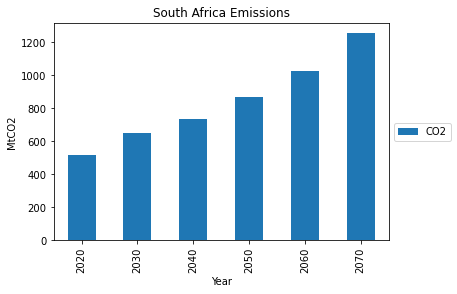

In [61]:
# Stacked bar chart for the CO2 emissions in the assessment period for the baseline scenario
rep_baseline.set_filters() #clears previous filters
rep_baseline.set_filters(n=['South Africa'])
rep_baseline.set_filters(e=['CO2'])
message_ix.reporting.computations.stacked_bar(rep_baseline.get('EMISS'), dims=['n', 'e', 'y'], units='MtCO2', title='Emissions', stacked=True)

<AxesSubplot:title={'center':'South Africa Emissions'}, xlabel='Year', ylabel='MtCO2'>

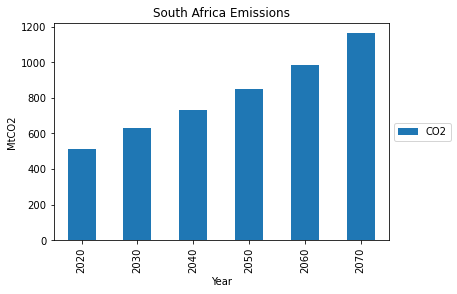

In [62]:
# Stacked bar chart for the CO2 emissions in the assessment period for the SSP1 scenario
rep_SSP1_Scenario.set_filters() #clears previous filters
rep_SSP1_Scenario.set_filters(n=['South Africa'])
rep_SSP1_Scenario.set_filters(e=['CO2'])
message_ix.reporting.computations.stacked_bar(rep_SSP1_Scenario.get('EMISS'), dims=['n', 'e', 'y'], units='MtCO2', title='Emissions', stacked=True)

<AxesSubplot:title={'center':'South Africa Emissions'}, xlabel='Year', ylabel='MtCO2'>

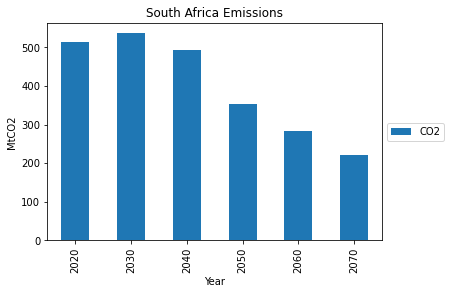

In [63]:
# Stacked bar chart for the CO2 emissions in the assessment period for the SSP1 BE scenario
rep_SSP1_BE_Scenario.set_filters() #clears previous filters
rep_SSP1_BE_Scenario.set_filters(n=['South Africa'])
rep_SSP1_BE_Scenario.set_filters(e=['CO2'])
message_ix.reporting.computations.stacked_bar(rep_SSP1_BE_Scenario.get('EMISS'), dims=['n', 'e', 'y'], units='MtCO2', title='Emissions', stacked=True)

#### Printing the CO2 emissions in 2050 for all scenarios
Used to produce a simple visual comparision diagram to the report

In [64]:
#producing baseline emission value for CO2 for 2050. Used to produce diagram for visual comparision
rep_baseline.set_filters() #clears previous filters
rep_baseline.set_filters(n=['South Africa'])
rep_baseline.set_filters(y=['2050'])
rep_baseline.set_filters(e=['CO2'])
rep_baseline.get('EMISS')

n             e    type_tec  y   
South Africa  CO2  all       2050    866.594934
Name: EMISS, dtype: float64

In [65]:
#producing SSP1 scenario emission value for CO2 for 2050. Used to produce diagram for visual comparision
rep_SSP1_Scenario.set_filters() #clears previous filters
rep_SSP1_Scenario.set_filters(n=['South Africa'])
rep_SSP1_Scenario.set_filters(y=['2050'])
rep_SSP1_Scenario.set_filters(e=['CO2'])
rep_SSP1_Scenario.get('EMISS')

n             e    type_tec  y   
South Africa  CO2  all       2050    850.86434
Name: EMISS, dtype: float64

In [66]:
#producing SSP1 BE scenario emission value for CO2 for 2050. Used to produce diagram for visual comparision
rep_SSP1_BE_Scenario.set_filters() #clears previous filters
rep_SSP1_BE_Scenario.set_filters(n=['South Africa'])
rep_SSP1_BE_Scenario.set_filters(y=['2050'])
rep_SSP1_BE_Scenario.set_filters(e=['CO2'])
rep_SSP1_BE_Scenario.get('EMISS')

n             e    type_tec  y   
South Africa  CO2  all       2050    352.574693
Name: EMISS, dtype: float64

### Extraction results
We first produce plots without any filter and afterwards prot where coal are excluded.

#### Extraction plots without filters

<AxesSubplot:title={'center':'South Africa Baseline Extraction'}, xlabel='Year', ylabel='GW'>

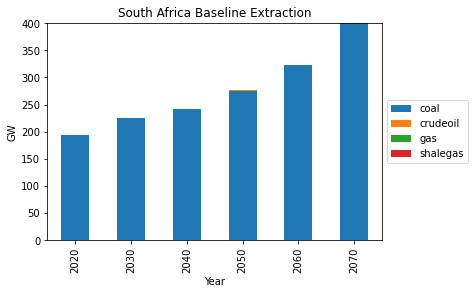

In [67]:
# Plotting the extraction for the baseline scenario
rep_baseline.set_filters() #clears previous filters

message_ix.reporting.computations.stacked_bar(rep_baseline.get('EXT'), dims=['n', 'c', 'y'], units='GW', title='Baseline Extraction', stacked=True)

<AxesSubplot:title={'center':'South Africa SSP1 Extraction'}, xlabel='Year', ylabel='GW'>

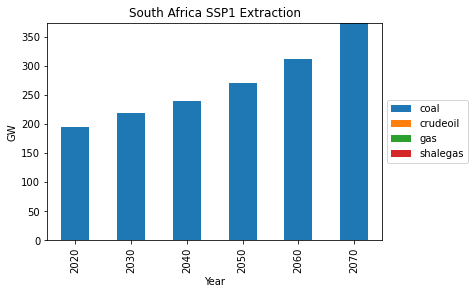

In [68]:
# Plotting the extraction for the SSP1 scenario
rep_SSP1_Scenario.set_filters() #clears previous filters

message_ix.reporting.computations.stacked_bar(rep_SSP1_Scenario.get('EXT'), dims=['n', 'c', 'y'], units='GW', title='SSP1 Extraction', stacked=True)

<AxesSubplot:title={'center':'South Africa SSP1 BE Extraction'}, xlabel='Year', ylabel='GW'>

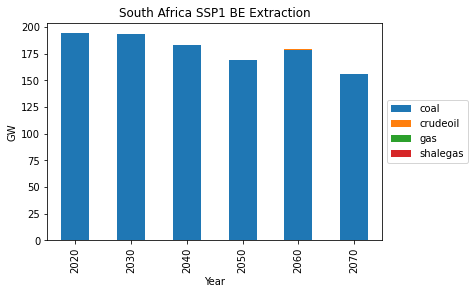

In [69]:
# Plotting the extrction for the SSP1 BE scenario
rep_SSP1_BE_Scenario.set_filters() #clears previous filters

message_ix.reporting.computations.stacked_bar(rep_SSP1_BE_Scenario.get('EXT'), dims=['n', 'c', 'y'], units='GW', title='SSP1 BE Extraction', stacked=True)

#### Extraction plots without coal

<AxesSubplot:title={'center':'South Africa Baseline Extraction'}, xlabel='Year', ylabel='GW'>

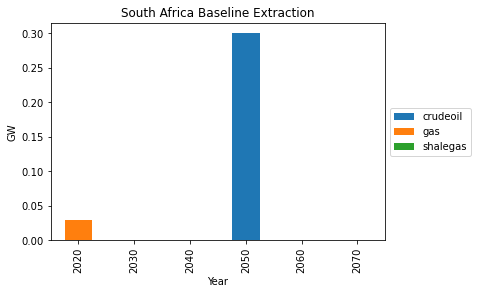

In [70]:
# Plotting the extraction for the baseline scenario
rep_baseline.set_filters() #clears previous filters
rep_baseline.set_filters(c=['crudeoil', 'gas', 'shalegas'])


message_ix.reporting.computations.stacked_bar(rep_baseline.get('EXT'), dims=['n', 'c', 'y'], units='GW', title='Baseline Extraction', stacked=True)

<AxesSubplot:title={'center':'South Africa SSP1 Extraction'}, xlabel='Year', ylabel='GW'>

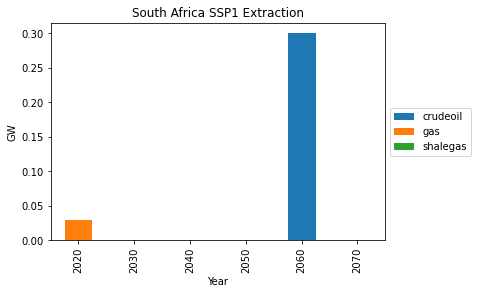

In [71]:
# Plotting the extraction for the SSP1 scenario
rep_SSP1_Scenario.set_filters() #clears previous filters
rep_SSP1_Scenario.set_filters(c=['crudeoil', 'gas', 'shalegas'])


message_ix.reporting.computations.stacked_bar(rep_SSP1_Scenario.get('EXT'), dims=['n', 'c', 'y'], units='GW', title='SSP1 Extraction', stacked=True)

<AxesSubplot:title={'center':'South Africa SSP1 BE Extraction'}, xlabel='Year', ylabel='GW'>

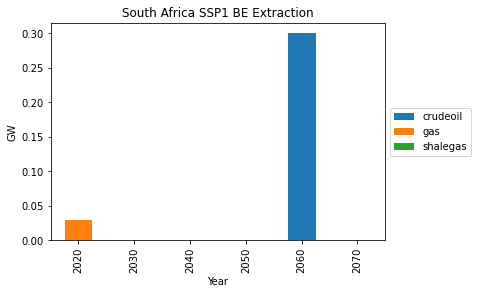

In [72]:
# Plotting the extrction for the SSP1 BE scenario
rep_SSP1_BE_Scenario.set_filters() #clears previous filters
rep_SSP1_BE_Scenario.set_filters(c=['crudeoil', 'gas', 'shalegas'])

message_ix.reporting.computations.stacked_bar(rep_SSP1_BE_Scenario.get('EXT'), dims=['n', 'c', 'y'], units='GW', title='SSP1 BE Extraction', stacked=True)

### New capacity results

<AxesSubplot:title={'center':'South Africa Baseline New Capacity'}, xlabel='Year', ylabel='GWa'>

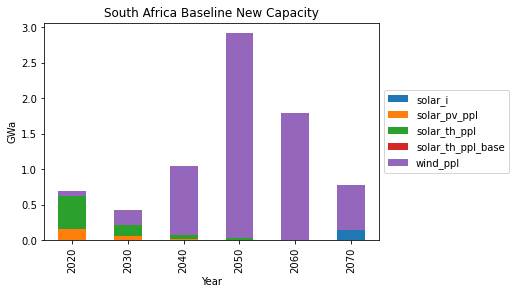

In [73]:
# Plotting the new capacity for the baseline scenario
rep_baseline.set_filters() #clears previous filters
rep_baseline.set_filters(yv=[2020, 2030, 2040, 2050, 2060, 2070])
rep_baseline.set_filters(t=['solar_i','solar_rc', 'solar_pv_ppl','solar_pv_ppl', 'solar_th_ppl','solar_th_ppl_base','wind_ppl'])


message_ix.reporting.computations.stacked_bar(rep_baseline.get('CAP_NEW'), dims=['nl', 't', 'yv'], units='GWa', title='Baseline New Capacity', stacked=True)

<AxesSubplot:title={'center':'South Africa SSP1 New Capacity'}, xlabel='Year', ylabel='GWa'>

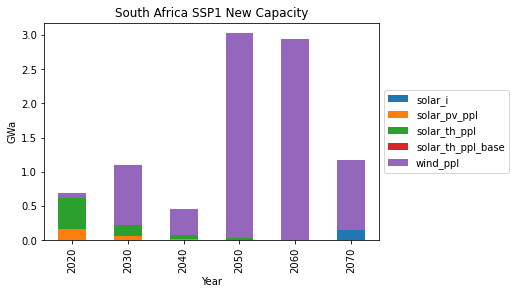

In [74]:
# Plotting the new capacity for the SSP1 scenario
rep_SSP1_Scenario.set_filters() #clears previous filters
rep_SSP1_Scenario.set_filters(yv=[2020, 2030, 2040, 2050, 2060, 2070])
rep_SSP1_Scenario.set_filters(t=['solar_i','solar_rc', 'solar_pv_ppl','solar_th_ppl','solar_th_ppl_base','wind_ppl'])

message_ix.reporting.computations.stacked_bar(rep_SSP1_Scenario.get('CAP_NEW'), dims=['nl', 't', 'yv'], units='GWa', title='SSP1 New Capacity', stacked=True)

<AxesSubplot:title={'center':'South Africa SSP1 BE New Capacity'}, xlabel='Year', ylabel='GWa'>

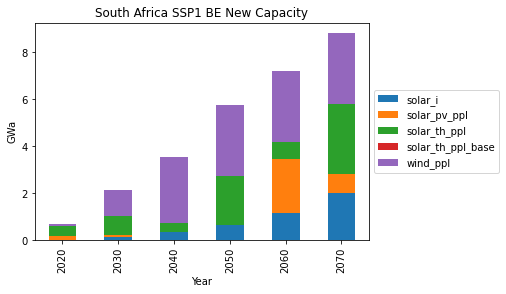

In [75]:
# Plotting the new capacity for the SSP1 BE scenario
rep_SSP1_BE_Scenario.set_filters() #clears previous filters
rep_SSP1_BE_Scenario.set_filters(yv=[2020, 2030, 2040, 2050, 2060, 2070])
rep_SSP1_BE_Scenario.set_filters(t=['solar_i','solar_rc', 'solar_pv_ppl','solar_th_ppl','solar_th_ppl_base','wind_ppl'])
rep_SSP1_BE_Scenario.get('CAP_NEW')

message_ix.reporting.computations.stacked_bar(rep_SSP1_BE_Scenario.get('CAP_NEW'), dims=['nl', 't', 'yv'], units='GWa', title='SSP1 BE New Capacity', stacked=True)

### Activity results
Since the activity contains all the technologies, we introduced a technology filter to display a selected area of the activity results. In adittion to this we chose to assess a snapshot of the assessment, i.e. the activity in 2050.

We intoduce filter for both the construction year (yv = year vintage) and the year of operation (ya = year actual), and put both to 2050. In other words, we display the activity for the selected technologies that were constructed in 2040 and 2050 and had operation in 2050. These diagrams are thus illustating only a small part of the total activity produced by the model and must be interpreted with caution.

NB: See the markup in codeblock X regarding introducing a "drop" variable to the stacked bar chart function in the computations.py code.

<AxesSubplot:title={'center':'South Africa Baseline Activity'}, xlabel='Year', ylabel='GWa'>

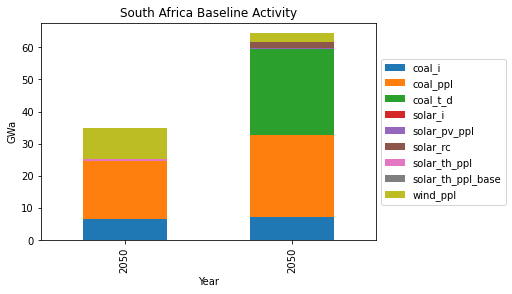

In [76]:
# Plotting the snapchot activity for the selected technologies in 2050 for the baseline scenario
rep_baseline.set_filters() #clears previous filters
rep_baseline.set_filters(t=['coal_ppl', 'coal_t_d', 'coal_i', 'solar_rc', 'wind_ppl','solar_i', 'solar_pv_ppl','solar_th_ppl','solar_th_ppl_base'])
rep_baseline.set_filters(yv=[2040, 2050])
rep_baseline.set_filters(ya=[2050])

message_ix.reporting.computations.stacked_bar(rep_baseline.get('ACT'), dims=['nl', 't', 'ya'], units='GWa', title='Baseline Activity', stacked=True, drop=['yv'])

<AxesSubplot:title={'center':'South Africa SSP1 Activity'}, xlabel='Year', ylabel='GWa'>

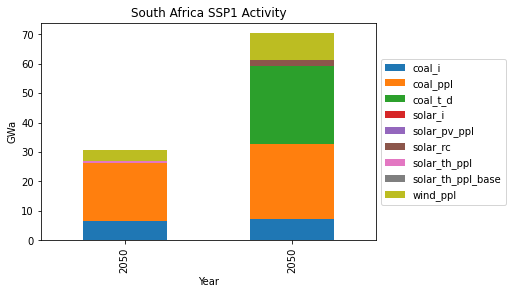

In [77]:
# Plotting the snapchot activity for the selected technologies in 2050 for the SSP1 scenario
rep_SSP1_Scenario.set_filters() #clears previous filters
rep_SSP1_Scenario.set_filters(t=['coal_ppl', 'coal_t_d', 'coal_i', 'solar_rc', 'wind_ppl','solar_i', 'solar_pv_ppl','solar_th_ppl','solar_th_ppl_base'])
rep_SSP1_Scenario.set_filters(yv=[2040,2050])
rep_SSP1_Scenario.set_filters(ya=[2050])

message_ix.reporting.computations.stacked_bar(rep_SSP1_Scenario.get('ACT'), dims=['nl', 't', 'ya'], units='GWa', title='SSP1 Activity', stacked=True, drop=['yv'])

<AxesSubplot:title={'center':'South Africa SSP1 BE Activity'}, xlabel='Year', ylabel='GWa'>

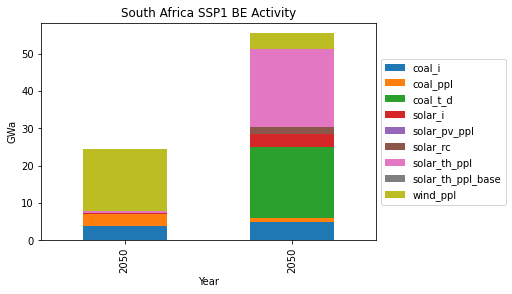

In [78]:
# Plotting the snapchot activity for the selected technologies in 2050 for the SSP1 BE scenario
rep_SSP1_BE_Scenario.set_filters() #clears previous filters
rep_SSP1_BE_Scenario.set_filters(t=['coal_ppl', 'coal_t_d', 'coal_i', 'solar_rc', 'wind_ppl','solar_i', 'solar_pv_ppl','solar_th_ppl','solar_th_ppl_base'])
rep_SSP1_BE_Scenario.set_filters(yv=[2040,2050])
rep_SSP1_BE_Scenario.set_filters(ya=[2050])

message_ix.reporting.computations.stacked_bar(rep_SSP1_BE_Scenario.get('ACT'), dims=['nl', 't', 'ya'], units='GWa', title='SSP1 BE Activity', stacked=True, drop=['yv'])

### Scenario assessment finished, closing database

In [79]:
# close platform connection
mp.close_db()